In [1]:
import matplotlib.pyplot as plt
import numpy as np
import primes_list as pr_ls

from matplotlib import animation as a_nim
from IPython.display import HTML
import random as rd

In [2]:
pal_pr = [3 , 7 , 11 , 101 , 131 , 151 , 181 , 191 , 313 , 353 , 373 , 383 , 727 , 757 , 787 , 797 , 919 , 929 , 10301 , 10501 , 10601 , 11311 , 11411 , 12421 , 12721 , 12821 , 13331 , 13831 , 13931 , 14341 , 14741 , 15451 , 15551 , 16061 , 16361 , 16561 , 16661 , 17471 , 17971 , 18181 , 18481 , 19391 , 19891 , 19991 , 30103 , 30203 , 30403 , 30703 , 30803 , 31013 , 31513 , 32323 , 32423 , 33533 , 34543 , 34843 , 35053 , 35153 , 35353 , 35753 , 36263 , 36563 , 37273 , 37573 , 38083 , 38183 , 38783 , 39293 , 70207 , 70507 , 70607 , 71317 , 71917 , 72227 , 72727 , 73037 , 73237 , 73637 , 74047 , 74747 , 75557 , 76367 , 76667 , 77377 , 77477 , 77977 , 78487 , 78787 , 78887 , 79397 , 79697 , 79997 , 90709 , 91019 , 93139 , 93239 , 93739 , 94049 , 94349 , 94649 , 94849 , 94949 , 95959 , 96269 , 96469 , 96769 , 97379 , 97579 , 97879 , 98389 , 98689]

In [4]:
class Draw_Anim:  
    def __init__(self, ls_p_var, v_spread, set_factor, t_start, t_end, t_step, v_interval, v_frames):
        self.p_var_ls = ls_p_var
        self.t_spread = v_spread
        self.factor_set = set_factor
        self.start_t = t_start
        self.end_t = t_end
        self.step_t = t_step
        self.interval_v = v_interval
        self.frames_v = v_frames
        self.fig, self.axes = plt.subplots()
        plt.xticks([])
        plt.yticks([])
        self.anim = a_nim.FuncAnimation(self.fig, self.animate, frames=v_frames, interval=v_interval)
    def animate(self, v_interval):
        self.t_var = np.linspace(self.start_t,self.end_t,self.step_t)
        self.x_var, self.y_var = [], []
        for set_pr in range(len(self.p_var_ls)):
            for len_x in range(len(self.t_var)):
                self.x_var += [self.complex_conjugate(False, v_interval, set_pr, len_x)]
                self.y_var += [self.complex_conjugate(True,  v_interval, set_pr, len_x)]
            self.x_var, self.y_var = np.array(self.x_var), np.array(self.y_var)
            self.sc_ax = self.axes.scatter(self.x_var, self.y_var, s=2, alpha=.75)
    def init_anim(self):
        print('(',self.p_var_ls,',',self.t_spread,',', self.factor_set,',', self.start_t,',', self.end_t,
              ',', self.step_t, ',', self.interval_v,',', self.frames_v,')')
        return HTML(self.anim.to_jshtml())
    def save_anim(self, f_name='0'):
        self.anim.save('{}.gif'.format(f_name))
    def complex_conjugate(self, im_re, v_interval,  set_pr, len_x):
        c_e  = np.e                    
        c_pi = np.pi
        f_add = self.factor_set
        c_spread = self.t_spread                   # Sub constant s_p  (effective magnitude ? 0.001 - 1000)
        v_linspace = self.t_var[len_x]             # Sub variable f_x
        v_prime = pal_pr[self.p_var_ls[set_pr]]       # Sub variable p_r
        v_fxg = v_linspace - v_interval            # Variable
        v_s_ls = v_linspace * len_x                # local extrema list of independent x var times its own index?
        pr_set_id_inv = 1/(set_pr+f_add)           # homographic projection ?
        x_in = (v_prime * v_fxg) / (c_spread)      # T        
        f_xg =  c_e ** (-(4/2) * 1j * c_pi * x_in) # Complex identity
        f_in = v_interval*(f_xg-v_prime)           # Identity  scale
        g_in = v_s_ls * v_fxg * pr_set_id_inv      # Conjugate scale 
        if im_re ==   False:
            return (g_in * np.real(f_in*f_xg))
        elif im_re == True:
            return (g_in * np.imag(f_in*f_xg))
        
def rand_pr_i(min_r=0,max_r=25996):
    return rd.randrange(min_r,max_r)

def get_rand_ls(nr_entry_id=2, min_start_id=1, step_id=31, sort_ls = True):
    hot_ls = []
    for i in range(nr_entry_id):
        hot_ls += [rand_pr_i(min_start_id+(step_id*i), (min_start_id+step_id*(i+1)))]
    if sort_ls == True:
        hot_ls.sort()
        return hot_ls
    else:
        return hot_ls
    
def find_factor_of(the_integer):
    find_factor_list = []
    for i in range(the_integer):
        if (the_integer / (i+1)) == int(the_integer /(i+1)):
            if (i+1 != 1) and (i+1 != the_integer):
                find_factor_list += [i+1]
    return find_factor_list

pot = pr_ls.primesofthousands


In [ ]:
call_d_b = Draw_Anim(get_rand_ls(2,1,55)[::-1], 
                                    .142857, 
                                    .142857,               #1.0142857,
                                -11 , 11 , 
                                   1823,
                                125,     75)
call_d_b.init_anim()
# ( [72, 12] , 0.142857 , 0.142857 , -11 , 11 , 1823 , 125 , 75 ) # woow
# ( [110, 29] , 0.142857 , 0.142857 , -11 , 11 , 1823 , 125 , 75 )
#( [58, 23] , 0.142857 , 0.142857 , -11 , 11 , 1823 , 125 , 75 )

MovieWriter ffmpeg unavailable; using Pillow instead.


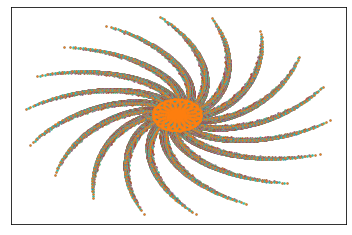

In [51]:
#call_d_b = Draw_Anim( [72, 12] , 0.142857 , 0.142857 , -11 , 11 , 1823 , 125 , 75 )
#call_d_b.save_anim('Wow_v3')
#call_d_b.init_anim()

In [ ]:
call_d_b = Draw_Anim([95, 88], 
                                    .0142857, 
                                    .0142857,               #1.0142857,
                                -11 , 11 , 
                                   710,
                                125,     75)
call_d_b.init_anim() 
#( [90, 4] , 0.0142857 , 0.0142857 , -11 , 11 , 710 , 125 , 75 )

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(3,1,33)[::-1], 
                                    .0142857, 
                                    .0142857,               #1.0142857,
                                8 , 11 , 
                                   1823,
                                125,     75)
call_d_b.init_anim() 

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(3,1,33)[::-1], 
                                    .0142857, 
                                    .0142857,               #1.0142857,
                                8 , 11 , 
                                   1823,
                                125,     75)
call_d_b.init_anim() 

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(2,1,55)[::-1], 
                                    .0142857, 
                                    .0142857,               #1.0142857,
                                -11 , 11 , 
                                   1823,
                                125,     75)
call_d_b.init_anim() 
#( [78, 19] , 0.0142857 , 0.0142857 , -11 , 11 , 1823 , 125 , 75 )

In [ ]:
#call_d_b = Draw_Anim( [93] , 1 , 1 , -11 , 11 , 710 , 75 , 75 )
#call_d_b.init_anim()
#call_d_b.save_anim('Wow_v2')
# ( [93] , 1 , 1 , -11 , 11 , 710 , 75 , 75 ), # YESSS

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(4,1,25)[::-1], 
                                1.0142857,
                                    8.8, 
                        8 , 11 , 
                                    1823,          # 
                                75,     75)
call_d_b.init_anim() 

In [ ]:
call_d_b = Draw_Anim( get_rand_ls(2,1,50)[::-1],
                       0.1, 0.1 , 
                       8 , 11 , 
                     2000 , 125 , 50 )
call_d_b.init_anim() # spot on metallic 
# ( [29, 25] , 0.1 , 0.1 , 8 , 11 , 2000 , 125 , 50 ) # #
#( [29, 14] , 0.1 , 0.1 , 8 , 11 , 2000 , 125 , 50 ) #
# ( [7] , 0.1 , 0.1 , 8 , 11 , 2000 , 125 , 50 )
#( [49, 44, 27, 17, 7] , 0.1 , 0.1 , 8 , 11 , 2000 , 125 , 50 )

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(8,1,5)[::-1],
                          1, 1 , 
                       -11 , 11 , 
                          710 , 
                        75 , 75 )
call_d_b.init_anim()
#call_d_b.save_anim('Wow_v1')
# ( [93] , 1 , 1 , -11 , 11 , 710 , 75 , 75 ) # YESSS

In [7]:
get_rand_ls(1,1,110)

[91]

In [ ]:
call_d_b = Draw_Anim( get_rand_ls(1,1,110)[::-1],
                       -0.1, 0.1 , 
                       -11 , 11 , 
                           111 , 
                        111 , 111 )
call_d_b.init_anim()

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(1,1,110)[::-1],
                       .1, 1 , 
                       0 , 11 , 
                        111 , 
                     75 , 50 )
call_d_b.init_anim()              

In [ ]:
call_d_b = Draw_Anim( get_rand_ls(1,1,110)[::-1],
                                    .1,  .1, 
                                    8,    11,  
                                      2000, 
                                    125, 50)
call_d_b.init_anim()

In [ ]:
call_d_b = Draw_Anim( get_rand_ls(1,1,110)[::-1],
                                    .1,  .1, 
                                    8,    11,  
                                      1000, 
                                    125, 50)
call_d_b.init_anim()

In [ ]:
          call_d_b = Draw_Anim( get_rand_ls(1,1,110)[::-1], 
                       .1, .1 , 
                       0 , 11 , 
                        111 , 
                     75 , 25 )
call_d_b.init_anim()      

In [ ]:
call_d_b = Draw_Anim(get_rand_ls(4,1,25)[::-1],
                                    1, 
                                    1,
                             .0142,    .6449,
                                   2000,
                                125,     25)
call_d_b.init_anim() 

In [5]:
find_factor_of(25996)

[2, 4, 67, 97, 134, 194, 268, 388, 6499, 12998]

In [5]:
len(pal_pr)

111